In [36]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

import utils

In [37]:
eth_data = utils.load_eth_data()

eth_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353


In [38]:
close_data = eth_data['Close'].values

In [39]:
close_data.shape

(1734,)

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_data = scaler.fit_transform(close_data.reshape(-1, 1))

In [41]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)


In [42]:
train_size = int(len(scaled_close_data) * 0.8)
sequence_length = 60

In [43]:
train_data = scaled_close_data[:train_size]
test_data = scaled_close_data[train_size:]

In [44]:
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [45]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [46]:
model = Sequential()

model.add(GRU(64, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))

model.add(GRU(64, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_164"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_328 (GRU)                   │ (None, 60, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_329 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,889 (148.00 KB)

 Trainable params: 37,889 (148.00 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0360 - val_loss: 0.0016
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0023 - val_loss: 9.1015e-04
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0022 - val_loss: 8.6190e-04
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0018 - val_loss: 7.7963e-04
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0018 - val_loss: 7.3797e-04
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms

In [48]:
# Fazer previsões
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [49]:
mse, mae, rmse = utils.get_metrics(real_prices, predicted_prices)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 82.61329571129139
MSE: 12378.158822628888
RMSE: 111.25717425239995


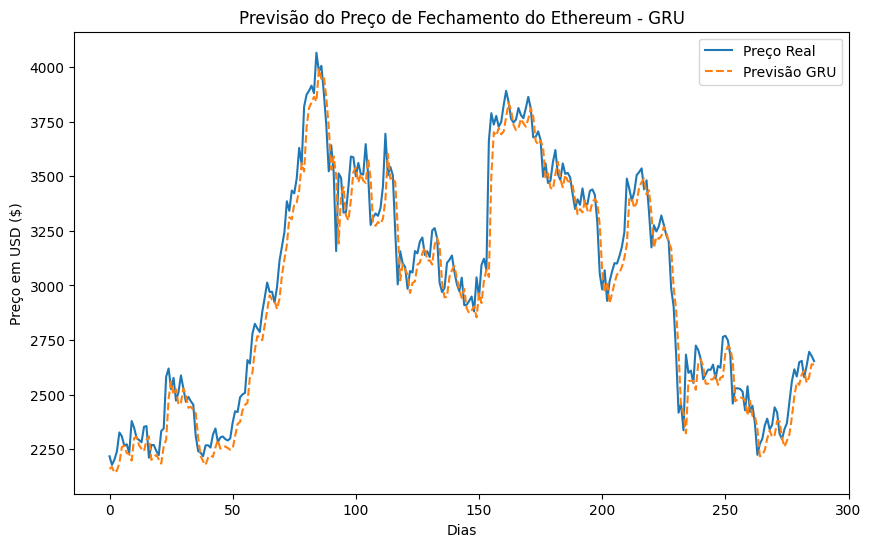

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Preço Real')
plt.plot(predicted_prices, label='Previsão GRU', linestyle='--')
plt.title('Previsão do Preço de Fechamento do Ethereum - GRU')
plt.xlabel('Dias')
plt.ylabel('Preço em USD ($)')
plt.legend()
plt.show()

# Andando pelo tempo

In [51]:
train_size = 100
test_size = 20
sequence_length = 15

all_predictions = []
all_test_data = []
mae_list, mse_list, rmse_list = [], [], []

In [52]:
for start in range(0, len(scaled_close_data) - train_size - test_size, test_size):
    data = scaled_close_data[start:start + train_size + test_size]

    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train, y_train = create_sequences(train_data, sequence_length)
    X_test, y_test = create_sequences(test_data, sequence_length)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(GRU(50))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    predicted_prices_scaled = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    all_predictions.extend(predicted_prices)
    all_test_data.extend(real_prices)

    mse, mae, rmse = utils.get_metrics(real_prices, predicted_prices)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

    print(f"Janela {start//test_size + 1}: MSE={mse}")

/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
Janela 1: MSE=50.54210321493445


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Janela 2: MSE=219.08045401992285


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
Janela 3: MSE=1938.737146088061


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
Janela 4: MSE=134.19766453602352


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Janela 5: MSE=121.30721623436531


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
Janela 6: MSE=21031.45880446597


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
Janela 7: MSE=4045.3415425853805


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
Janela 8: MSE=1029.561519582384


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Janela 9: MSE=208.81820170991068


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Janela 10: MSE=3951.980046034417


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Janela 11: MSE=8456.692899856716


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Janela 12: MSE=32608.652696704492


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Janela 13: MSE=14681.610094615073


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Janela 14: MSE=145602.8713757232


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Janela 15: MSE=91834.34373506904


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
Janela 16: MSE=25018.201101073595


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Janela 17: MSE=4880.189546817541


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Janela 18: MSE=119958.32571230235


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Janela 19: MSE=37782.9479221582


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Janela 20: MSE=1524199.6800357457


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
Janela 21: MSE=112770.81380193243


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Janela 22: MSE=33355.277055874445


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Janela 23: MSE=8415.119120660424


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
Janela 24: MSE=677.1270923376123


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Janela 25: MSE=122284.59111363879


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Janela 26: MSE=143227.4360316038


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Janela 27: MSE=134886.32476118804


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Janela 28: MSE=363923.9475839615


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Janela 29: MSE=301046.25244446995


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
Janela 30: MSE=485620.47916020156


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
Janela 31: MSE=188244.24293544292


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
Janela 32: MSE=81803.68811634772


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
Janela 33: MSE=32708.92237212662


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Janela 34: MSE=55587.39888195986


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Janela 35: MSE=11845.38077915907


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Janela 36: MSE=412375.67193872907


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Janela 37: MSE=190934.316046834


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
Janela 38: MSE=24892.34001908302


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
Janela 39: MSE=25096.131332471967


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
Janela 40: MSE=246730.64548869216


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
Janela 41: MSE=32398.54476394357


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Janela 42: MSE=16479.995404213678


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Janela 43: MSE=36834.74560008943


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Janela 44: MSE=19659.951588970423


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Janela 45: MSE=460.8002728968859


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Janela 46: MSE=179.0308623373518


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Janela 47: MSE=15321.823245480657


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Janela 48: MSE=15124.753068572283


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Janela 49: MSE=18638.190883356332


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Janela 50: MSE=5601.665652224421


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Janela 51: MSE=46234.68050328789


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Janela 52: MSE=5738.9192342907245


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Janela 53: MSE=8132.28811346889


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Janela 54: MSE=39870.67833230198


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Janela 55: MSE=48815.943708151564


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Janela 56: MSE=4081.937888637185


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Janela 57: MSE=41674.43899956644


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Janela 58: MSE=23854.082656309027


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Janela 59: MSE=46058.15200849176


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Janela 60: MSE=59400.73135984542


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Janela 61: MSE=48148.37736203671


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Janela 62: MSE=4665.32561711967


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Janela 63: MSE=759.0829924702645


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Janela 64: MSE=1309.9160981237849


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Janela 65: MSE=206.5843144536014


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Janela 66: MSE=36591.154978576305


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Janela 67: MSE=235244.14013286243


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Janela 68: MSE=74424.78492703736


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Janela 69: MSE=106474.19797754288


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Janela 70: MSE=41386.65084276199


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Janela 71: MSE=337016.20792146923


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Janela 72: MSE=467254.1302034378


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Janela 73: MSE=408721.1140366794


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Janela 74: MSE=80982.49267206197


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
Janela 75: MSE=10169.13538206818


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Janela 76: MSE=85145.4919896484


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Janela 77: MSE=97761.43732333183


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Janela 78: MSE=227636.43907983304


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Janela 79: MSE=33810.01693414441


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Janela 80: MSE=4596.86925791502


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Janela 81: MSE=2437.7981838107107


In [58]:
mse_overall, mae_overall, rmse_overall = utils.get_metrics(all_test_data, all_predictions)

print(f'MAE: {mae_overall}')
print(f'MSE: {mse_overall}')
print(f'RMSE: {rmse_overall}')

MAE: 219.30189548068577
MSE: 96339.30059591446
RMSE: 310.38572872462174


In [59]:
interpolated_mae = np.repeat(mae_list, len(all_test_data) // len(mae_list))

In [60]:
print(len(interpolated_mae), len(all_predictions))

405 405


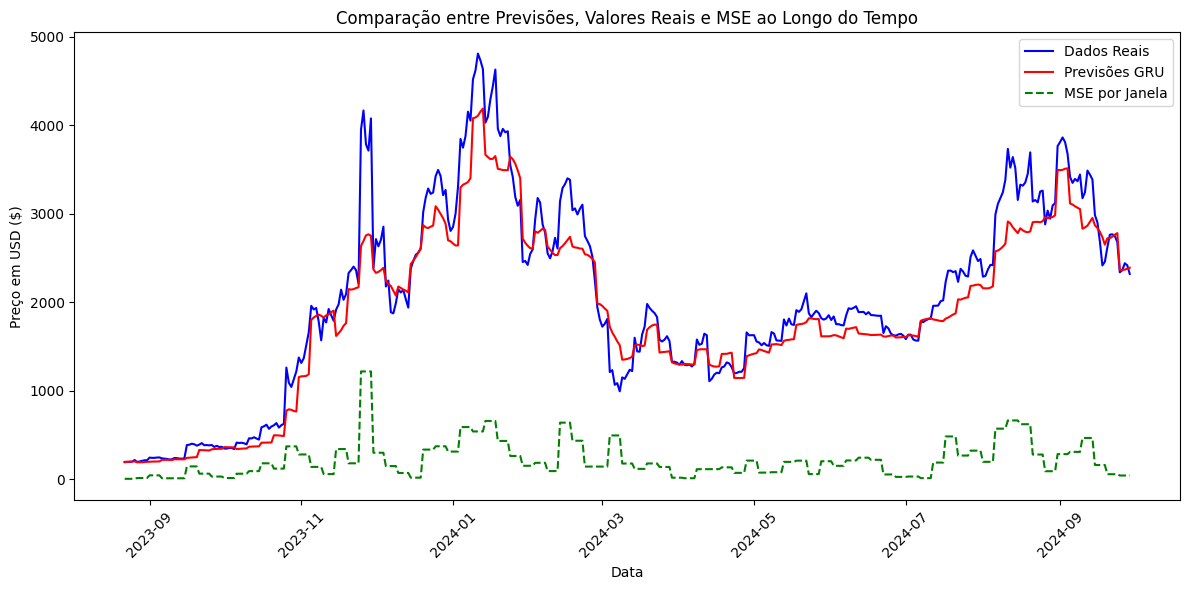

In [61]:
test_data_indices = eth_data.index[-len(all_test_data):]
plt.figure(figsize=(12, 6))
plt.plot(test_data_indices, all_test_data, label='Dados Reais', color='blue')
plt.plot(test_data_indices, all_predictions, label='Previsões GRU', color='red')
plt.plot(test_data_indices, interpolated_mae, label='MAE por Janela', color='green', linestyle='--')
plt.title('Comparação entre Previsões, Valores Reais e MAE ao Longo do Tempo')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Preço em USD ($)')
plt.legend()
plt.tight_layout()
plt.show()